In [19]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels 
from brainspace.datasets import load_conte69
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import plotting
import ptitprince as pt
import nibabel as nb
import seaborn as sns
import matplotlib.colors as colors

plt.rcParams["pdf.fonttype"]=42  #export as editable text
plt.rcParams["ps.fonttype"]=42
plt.rcParams["svg.fonttype"]="none" #export as editable text
cm=1/2.54                           #to convert figsize inches into cm 
plt.rcParams['axes.linewidth'] = 0.8

## color in Gradient 1 und 2 with mean T1q values

In [20]:
#load gradients and input structural connectivity matrix
gradients=np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
gradient1=gradients[:,0]
gradient2=gradients[:,1]

#T1q
T1q_stack=np.zeros((91, 109, 91,50))
sublist = np.arange(1,51,1)            # subjectlist
for s,sub in enumerate(sublist):
    # load in mprage_T1map
    T1q_img = nb.load("/data/p_02666/mica-mics/space_mp2rage_T1map_to_MNI/SUB_HC0{:02d}/fnirt_mp2rage_T1map_to_MNI2mm.nii.gz".format(sub)).get_fdata()
    T1q_stack[:,:,:,s]=T1q_img
T1q_mean=np.mean(T1q_stack, axis=3)

# import refined thalamus mask as reference
thala_ref_lh_path="/data/p_02666/mica-mics/thalamus_space_mni/space-MNI125_atlas-thalamus_lh_refined.nii.gz"
thala_ref_lh=nb.load(thala_ref_lh_path).get_fdata()
# collect indices of voxels where mask = 1 
idx_l=np.where(thala_ref_lh==1)
T1q=T1q_mean[idx_l]   



### plot mean T1q values on thalamus

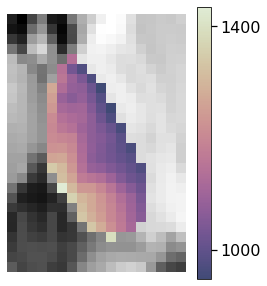

In [21]:
#mni background
mni=nb.load("/afs/.cbs.mpg.de/software/.fsl/6.0.3/debian-bullseye-amd64/data/standard/MNI152_T1_2mm.nii.gz").get_fdata()
slice_mni= mni[42:60,42:68,38]

#thomas atlas in 2mm
t1q_img_data=nb.load("/data/p_02666/Project1_thalamus/structural_covariance/grouplevel_T1q_map_lh.nii.gz").get_fdata()
t1q_img_data[np.where(t1q_img_data==0)] = np.NaN
#select slice
slice_= t1q_img_data[42:60,42:68,38]

#plot
fig, ax = plt.subplots(1, figsize=((4,5)))
colormap=sns.cubehelix_palette(start=2, rot=1, dark=0.3, light=0.9, reverse=True, as_cmap=True)
cax=plt.imshow(slice_mni.T, cmap="gray", origin="lower")
cax=plt.imshow(slice_.T, cmap=colormap, origin="lower")
plt.axis("off")
cbar = fig.colorbar(cax, orientation='vertical')
cbar.set_ticks([1000,1400])
cbar.ax.tick_params(labelsize=16)

cbar.ax.tick_params(labelsize=16)
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/mean_T1q_on_thalamus.pdf", transparent=True, format='pdf', dpi=600)


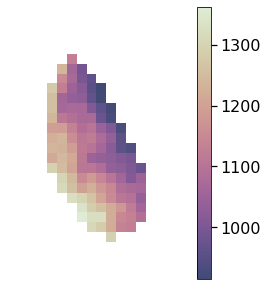

In [22]:
# plot individual qT1 

#thomas atlas in 2mm
t1q_img_data=nb.load("/data/p_02666/Project1_thalamus/structural_covariance/T1q_map_lh_sub01.nii.gz").get_fdata()
t1q_img_data[np.where(t1q_img_data==0)] = np.NaN
#select slice
slice_= t1q_img_data[42:60,42:68,38]

#plot
fig, ax = plt.subplots(1, figsize=((4,5)))
colormap=sns.cubehelix_palette(start=2, rot=1, dark=0.3, light=0.9, reverse=True, as_cmap=True)
cax=plt.imshow(slice_.T, cmap=colormap, origin="lower")
plt.axis("off")
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.tick_params(labelsize=16)

plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/T1q_on_thalamus_sub01.pdf", transparent=True, format='pdf', dpi=600)


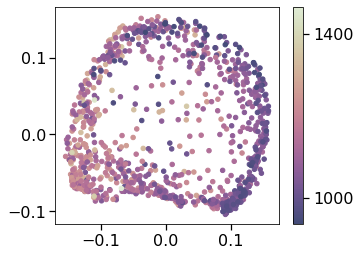

In [23]:
fig, ax=plt.subplots(1, figsize=(5,4))
#fig = sns.set_context("notebook", font_scale=1, rc={ 'font.family':'Arial'})
colormap=sns.cubehelix_palette(start=2, rot=1, dark=0.3, light=0.9, reverse=True, as_cmap=True)
#colormap=sns.color_palette("dark:salmon", as_cmap=True)
fig = plt.scatter(gradient1, gradient2, c=T1q, cmap=colormap, alpha=1,s=20) 
#ax.set_xlabel("gradient 1", fontsize = 22, fontname="Arial", labelpad=8)
#ax.set_ylabel("gradient 2", fontsize = 22, fontname="Arial", labelpad=8)
ax.set_yticks([-0.1,0.0,0.1])
ax.tick_params(labelsize=16)
cbar=plt.colorbar()
cbar.set_ticks([1000,1400])
cbar.ax.tick_params(labelsize=16)

plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/T1q_distribution_left.svg", transparent=True, format='svg', dpi=600)

# plot correlation

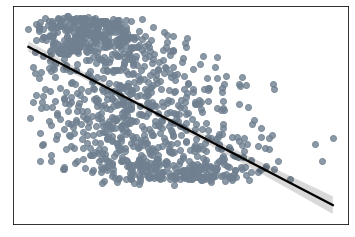

In [24]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["T1q"]=T1q
data["G1"]=gradient1
fig=sns.regplot(x="T1q", y="G1", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/scatter_T1q-g1_left.svg", transparent=True, format='svg', dpi=600)

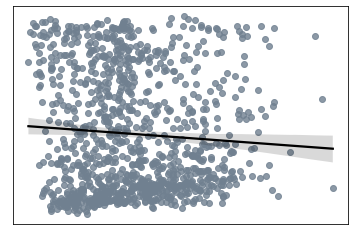

In [26]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["T1q"]=T1q
data["G2"]=gradient2
fig=sns.regplot(x="T1q", y="G2", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/scatter_T1q-g2_left.svg", transparent=True, format='svg', dpi=600)